In [624]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [625]:
df = pd.read_csv('data.csv')
df

,Student ID,Student Name,CGPA,Age,Semester,Gender
0,1,A,3.22,18.0,F22,male
1,2,B,NaN,20.0,S22,female
2,3,C,3.62,NaN,F23,female
3,4,D,4.00,20.0,F23,male
4,5,E,3.68,21.0,S23,male
5,6,F,3.89,22.0,S23,male
6,1,A,3.22,18.0,F22,male


In [626]:
df.isnull().values.any()

True

In [627]:
df.isnull()

,Student ID,Student Name,CGPA,Age,Semester,Gender
0,False,False,False,False,False,False
1,False,False,True,False,False,False
2,False,False,False,True,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False


In [628]:
# df.dropna(inplace=True)
# df

In [629]:
df.fillna(0)

,Student ID,Student Name,CGPA,Age,Semester,Gender
0,1,A,3.22,18.0,F22,male
1,2,B,0.00,20.0,S22,female
2,3,C,3.62,0.0,F23,female
3,4,D,4.00,20.0,F23,male
4,5,E,3.68,21.0,S23,male
5,6,F,3.89,22.0,S23,male
6,1,A,3.22,18.0,F22,male


In [630]:
df['CGPA'].fillna(df['CGPA'].mean(), inplace=True)
df['Age'].fillna(df['Age'].mean(),inplace=True)
df

C:\Users\conta\AppData\Local\Temp\ipykernel_4844\1900825602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CGPA'].fillna(df['CGPA'].mean(), inplace=True)
C:\Users\conta\AppData\Local\Temp\ipykernel_4844\1900825602.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

,Student ID,Student Name,CGPA,Age,Semester,Gender
0,1,A,3.220,18.000000,F22,male
1,2,B,3.605,20.000000,S22,female
2,3,C,3.620,19.833333,F23,female
3,4,D,4.000,20.000000,F23,male
4,5,E,3.680,21.000000,S23,male
5,6,F,3.890,22.000000,S23,male
6,1,A,3.220,18.000000,F22,male


In [631]:
le = LabelEncoder()

df['Semester'] = le.fit_transform(df['Semester'])
df['Gender'] = le.fit_transform(df['Gender'])
df

,Student ID,Student Name,CGPA,Age,Semester,Gender
0,1,A,3.220,18.000000,0,1
1,2,B,3.605,20.000000,2,0
2,3,C,3.620,19.833333,1,0
3,4,D,4.000,20.000000,1,1
4,5,E,3.680,21.000000,3,1
5,6,F,3.890,22.000000,3,1
6,1,A,3.220,18.000000,0,1


In [632]:
df1 = pd.get_dummies(df,columns=['Gender','Semester'])
df1

,Student ID,Student Name,CGPA,Age,Gender_0,Gender_1,Semester_0,Semester_1,Semester_2,Semester_3
0,1,A,3.220,18.000000,False,True,True,False,False,False
1,2,B,3.605,20.000000,True,False,False,False,True,False
2,3,C,3.620,19.833333,True,False,False,True,False,False
3,4,D,4.000,20.000000,False,True,False,True,False,False
4,5,E,3.680,21.000000,False,True,False,False,False,True
5,6,F,3.890,22.000000,False,True,False,False,False,True
6,1,A,3.220,18.000000,False,True,True,False,False,False


In [633]:
df.describe()

,Student ID,CGPA,Age,Semester,Gender
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,3.142857,3.605000,19.833333,1.428571,0.714286
std,1.951800,0.299875,1.462494,1.272418,0.487950
min,1.000000,3.220000,18.000000,0.000000,0.000000
25%,1.500000,3.412500,18.916667,0.500000,0.500000
50%,3.000000,3.620000,20.000000,1.000000,1.000000
75%,4.500000,3.785000,20.500000,2.500000,1.000000
max,6.000000,4.000000,22.000000,3.000000,1.000000


In [634]:
numeric = df[['Student ID','CGPA','Age','Semester','Gender']]
numeric

,Student ID,CGPA,Age,Semester,Gender
0,1,3.220,18.000000,0,1
1,2,3.605,20.000000,2,0
2,3,3.620,19.833333,1,0
3,4,4.000,20.000000,1,1
4,5,3.680,21.000000,3,1
5,6,3.890,22.000000,3,1
6,1,3.220,18.000000,0,1


In [635]:
numeric.corr()

,Student ID,CGPA,Age,Semester,Gender
Student ID,1.000000,0.837183,0.943930,0.843661,0.225000
CGPA,0.837183,1.000000,0.829409,0.650826,-0.017085
Age,0.943930,0.829409,1.000000,0.940403,-0.038925
Semester,0.843661,0.650826,0.940403,1.000000,-0.038348
Gender,0.225000,-0.017085,-0.038925,-0.038348,1.000000


In [636]:
correlation = df[['Age','CGPA']].corr()
correlation

,Age,CGPA
Age,1.000000,0.829409
CGPA,0.829409,1.000000


In [637]:
df2 = df[['Student ID','CGPA','Age','Semester','Gender']]
df2

,Student ID,CGPA,Age,Semester,Gender
0,1,3.220,18.000000,0,1
1,2,3.605,20.000000,2,0
2,3,3.620,19.833333,1,0
3,4,4.000,20.000000,1,1
4,5,3.680,21.000000,3,1
5,6,3.890,22.000000,3,1
6,1,3.220,18.000000,0,1


In [638]:
corr = df2.corr()
corr

,Student ID,CGPA,Age,Semester,Gender
Student ID,1.000000,0.837183,0.943930,0.843661,0.225000
CGPA,0.837183,1.000000,0.829409,0.650826,-0.017085
Age,0.943930,0.829409,1.000000,0.940403,-0.038925
Semester,0.843661,0.650826,0.940403,1.000000,-0.038348
Gender,0.225000,-0.017085,-0.038925,-0.038348,1.000000


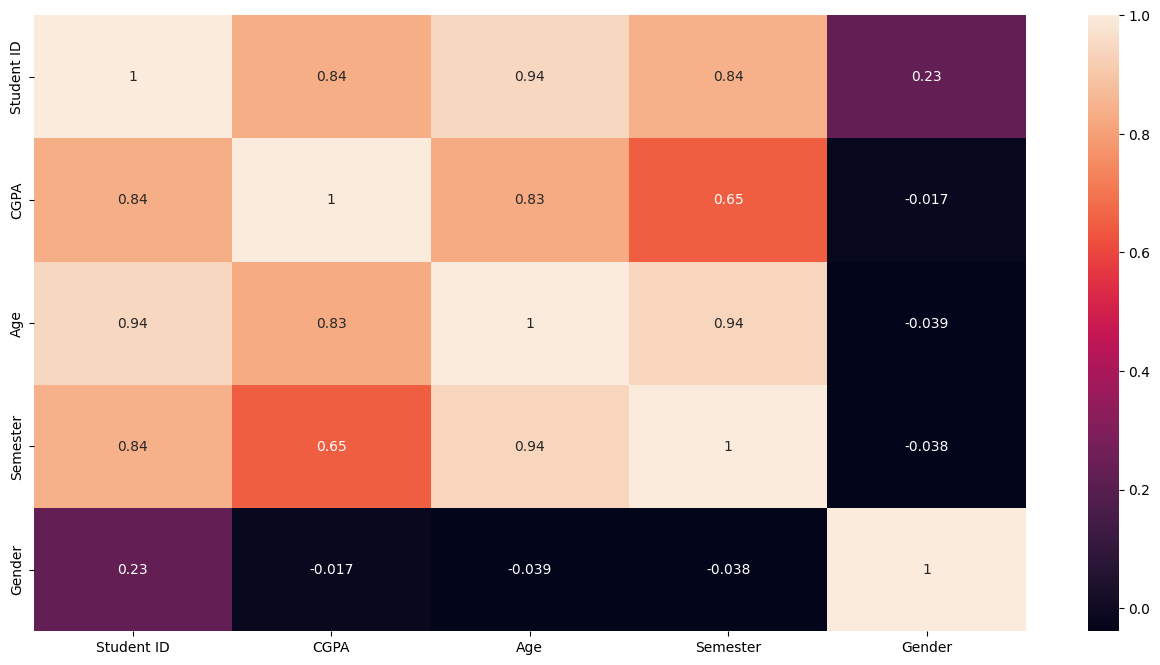

In [639]:
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True)
plt.show()

In [640]:
cg = df2.groupby('Age')['CGPA'].mean()
cg

Age
18.000000    3.2200
19.833333    3.6200
20.000000    3.8025
21.000000    3.6800
22.000000    3.8900
Name: CGPA, dtype: float64

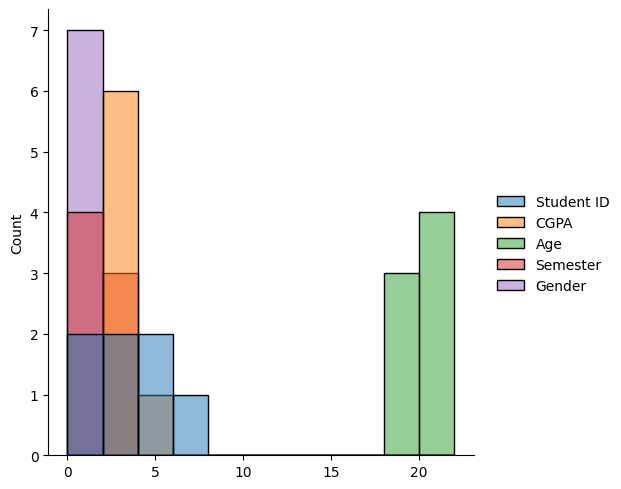

In [641]:
sns.displot(df)
plt.show()

In [642]:
asc = df2.sort_values(by='Student ID')
asc

,Student ID,CGPA,Age,Semester,Gender
0,1,3.220,18.000000,0,1
6,1,3.220,18.000000,0,1
1,2,3.605,20.000000,2,0
2,3,3.620,19.833333,1,0
3,4,4.000,20.000000,1,1
4,5,3.680,21.000000,3,1
5,6,3.890,22.000000,3,1


In [643]:
dsc = df2.sort_values(by='Student ID', ascending=False)
dsc

,Student ID,CGPA,Age,Semester,Gender
5,6,3.890,22.000000,3,1
4,5,3.680,21.000000,3,1
3,4,4.000,20.000000,1,1
2,3,3.620,19.833333,1,0
1,2,3.605,20.000000,2,0
0,1,3.220,18.000000,0,1
6,1,3.220,18.000000,0,1


Visualization


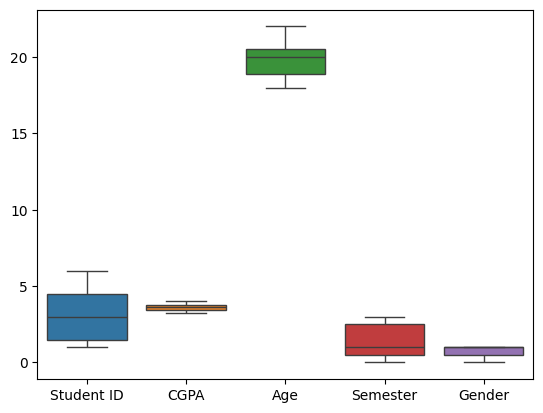

In [644]:
# plt.figure(figsize= (16,8))
sns.boxplot(df)
plt.show()

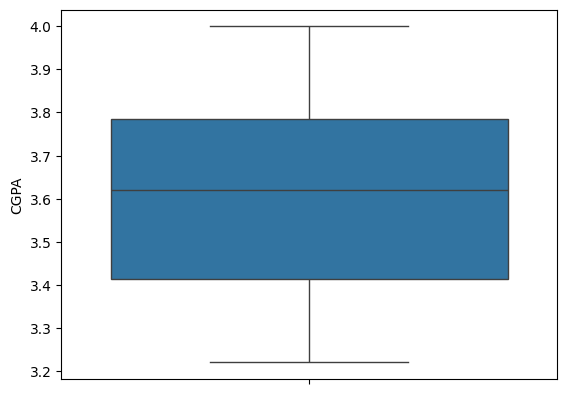

In [645]:

sns.boxplot(df['CGPA'])
plt.show()

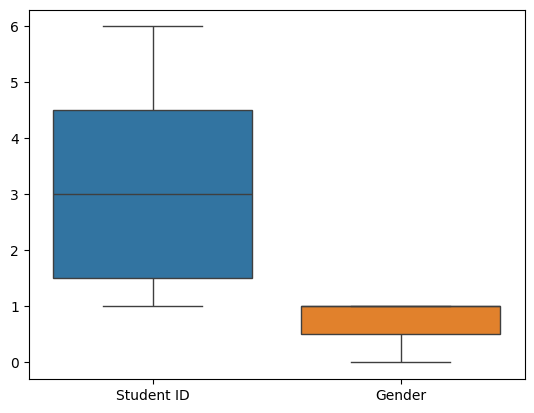

In [646]:

ax = sns.boxplot(df[['Student ID','Gender']])

array([[<Axes: title={'center': 'Student ID'}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Semester'}>],
       [<Axes: title={'center': 'Gender'}>, <Axes: >]], dtype=object)

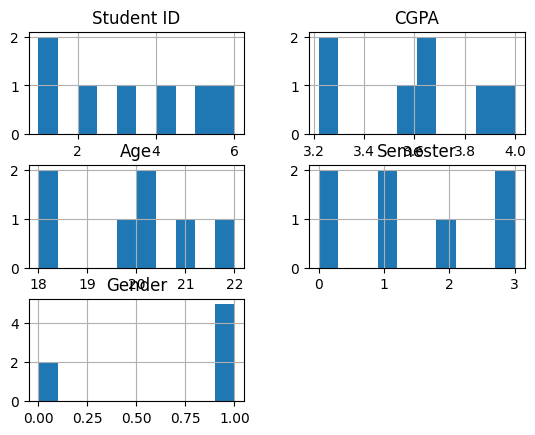

In [647]:
df.hist()

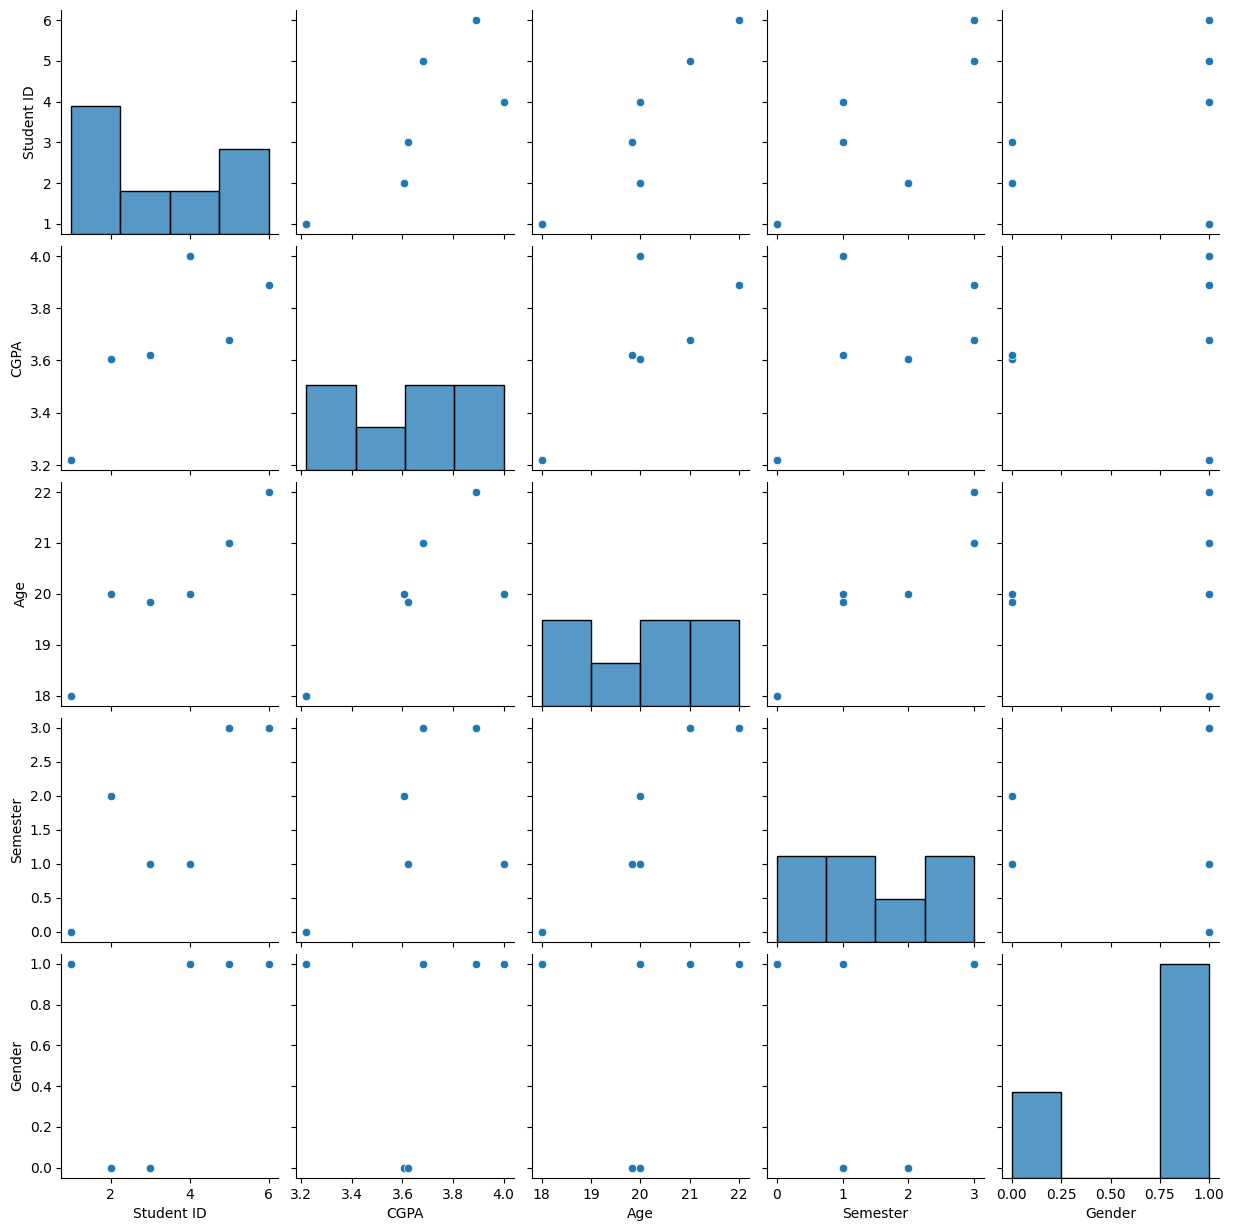

In [648]:
sns.pairplot(df)

<Axes: >

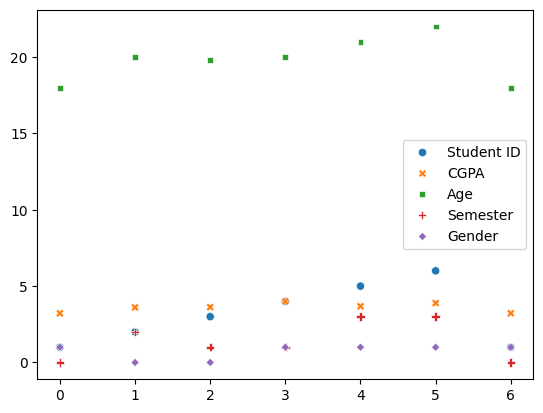

In [650]:
sns.scatterplot(df)